# Getting Started with Maps Binder

Research Question: buildings

Refer to [the installation section in README](https://github.com/Living-with-machines/MapReader#installation) to install `mapreader`.

In [1]:
# solve issue with autocomplete
%config Completer.use_jedi = False

%load_ext autoreload
%autoreload 2
%matplotlib inline

## Download maps via tileserver
`tileserver` provides an easy way to download maps from, e.g.,
* OS one-inch 2nd edition layer: https://mapseries-tilesets.s3.amazonaws.com/1inch_2nd_ed/index.html
By default, we use the `download_url` of OS one-inch 2nd edition layer:

In [1]:
from mapreader import TileServer

tileserver = TileServer(metadata_path="../../mapreader/persistent_data/metadata_OS_One_Inch_GB_WFS_light.json",
                        download_url="https://mapseries-tilesets.s3.amazonaws.com/1inch_2nd_ed/{z}/{x}/{y}.png")

Metada file has 480 items.
Download URL: https://mapseries-tilesets.s3.amazonaws.com/1inch_2nd_ed/{z}/{x}/{y}.png
Geometry: polygone


## Querying `lat` and `lon` to retrieve maps

In [20]:
tileserver.query_point([51.53, -0.12])
# # if append = False, only the last query will be stored
tileserver.query_point([51.4, 0.08], append=True)
tileserver.query_point([51.4, -0.13], append=True)
tileserver.query_point([51.52, 0.03], append=True)
# %% codecell
# To print all found queries
tileserver.print_found_queries()

------------
Found items:
------------
URL:     	https://maps.nls.uk/view/101168609
filepath:	map_101168609.png
coords:  	[-4.06538210e-01  2.07213000e-02  5.15026204e+01  5.16848974e+01]
index:   	378
URL:     	https://maps.nls.uk/view/101168708
filepath:	map_101168708.png
coords:  	[2.60010000e-04 4.27238360e-01 5.13189766e+01 5.15026204e+01]
index:   	391
URL:     	https://maps.nls.uk/view/101168702
filepath:	map_101168702.png
coords:  	[-4.15144570e-01  1.04388000e-02  5.13292371e+01  5.15114618e+01]
index:   	390
URL:     	https://maps.nls.uk/view/101168618
filepath:	map_101168618.png
coords:  	[1.04388000e-02 4.39101650e-01 5.14922981e+01 5.16759992e+01]
index:   	379


[WARNING] cartopy is not installed!


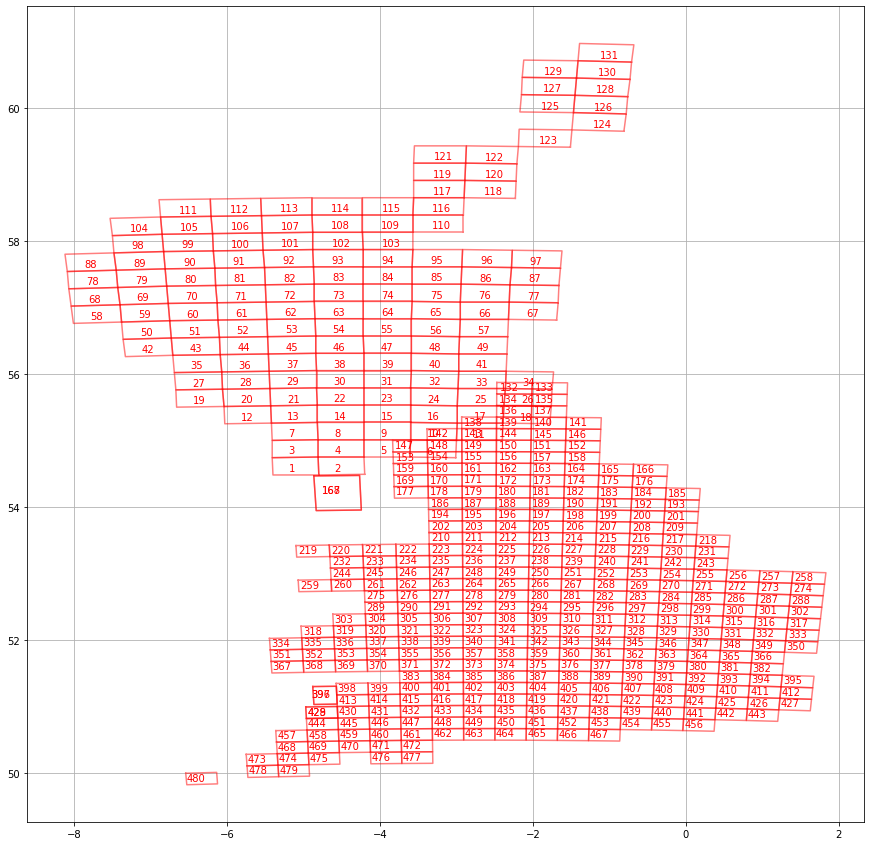

In [21]:
tileserver.plot_metadata_on_map(map_extent="uk", add_text=True)


## Retrieve/download maps

In [22]:
tileserver.download_tileserver(mode="query", 
                               zoom_level=14,
                               pixel_closest=50,
                               output_maps_dirname="./maps_tutorial")

-------------------
File already exists: ./maps_tutorial/map_101168609.png
-------------------
Retrieving:  https://maps.nls.uk/view/101168708
Downloaded 273/273
output image size: 4864 3328 tile size: 256 256
Progress: 100.0%
Saving
-------------------
Retrieving:  https://maps.nls.uk/view/101168702
Downloaded 271/271
output image size: 4864 3584 tile size: 256 256
Progress: 100.0%
Saving
-------------------
Retrieving:  https://maps.nls.uk/view/101168618
Downloaded 274/274
output image size: 4864 3584 tile size: 256 256
Progress: 100.0%
Saving


The results are stored in a directory structure as follow:

```
maps_tutorial
├── map_101168609.png
├── map_101168618.png
├── map_101168702.png
├── map_101168708.png
└── metadata.csv
geojson
├── 101168609_0.geojson
├── 101168618_3.geojson
├── 101168702_2.geojson
└── 101168708_1.geojson
```

## Load maps

In [27]:
from mapreader import loader
path2images = "./maps_tutorial/*png"
mymaps = loader(path2images)

In [28]:
print(f"Number of images: {len(mymaps)}")


Number of images: 4


## Display map


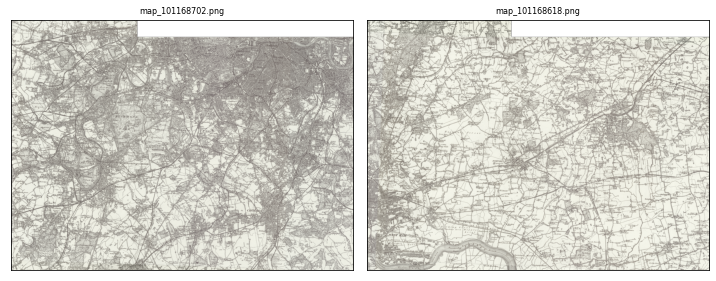

In [39]:
mymaps.show_sample(num_samples=2, tree_level="parent")


In [41]:
all_maps = mymaps.list_parents()


## Show one image


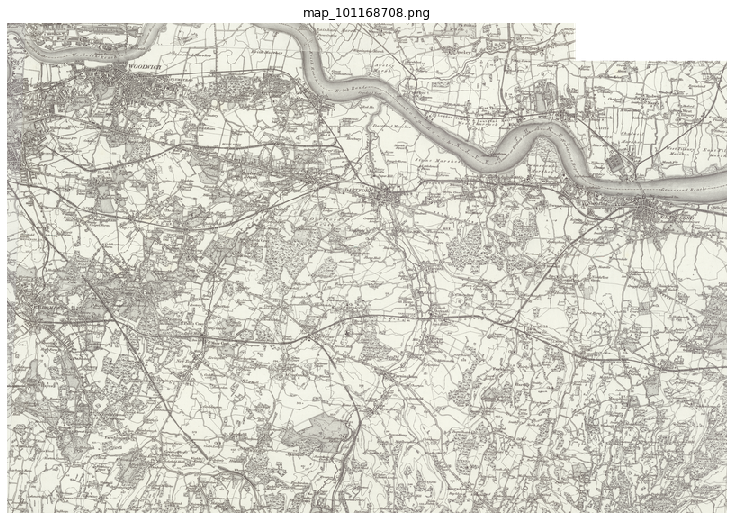

In [42]:
mymaps.show(all_maps[0], 
            tree_level="parent", 
            # to change the resolution of the image for plotting
            image_width_resolution=800)

## Slice Maps

Slicing maps_tutorial/map_101168708.png
----------------------------------------
Slicing maps_tutorial/map_101168618.png
----------------------------------------
Slicing maps_tutorial/map_101168609.png
----------------------------------------
Slicing maps_tutorial/map_101168702.png
----------------------------------------


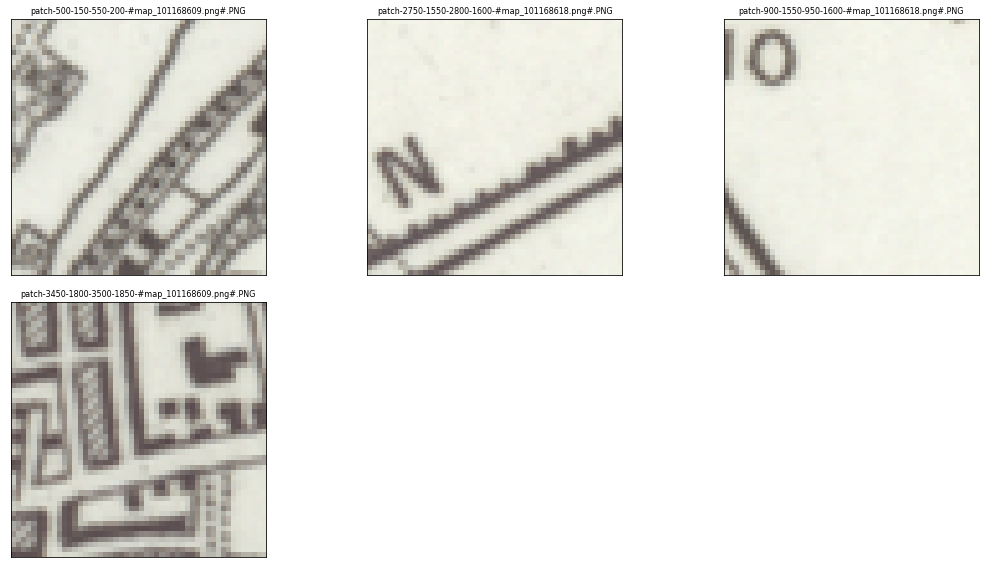

In [45]:
mymaps.sliceAll(path_save="./maps_tutorial/slice_50_50", 
                slice_size=50, # in pixels
                square_cuts=False, 
                verbose=False,
                method="pixel")
# %% codecell
mymaps.show_sample(4, tree_level="child")

## Calculate mean and standard-deviation of pixel intensities

 `calc_pixel_stats` method can be used to calculate mean and standard-deviation of pixel intensities of each `child` (i.e., `patch`) in a `parent` image.

In [47]:
# if parent_id="XXX", only compute pixel stats for that parent
mymaps.calc_pixel_stats()

----------
[INFO] calculate pixel stats for image: map_101168708.png
----------
[INFO] calculate pixel stats for image: map_101168618.png
----------
[INFO] calculate pixel stats for image: map_101168609.png
----------
[INFO] calculate pixel stats for image: map_101168702.png


In [48]:
maps_pd, patches_pd = mymaps.convertImages(fmt="dataframe")

In [49]:
maps_pd.head()


,parent_id,image_path,children
map_101168708.png,None,/Users/clast/Documents/2021_projects/LwM/MapRe...,"[patch-0-0-50-50-#map_101168708.png#.PNG, patc..."
map_101168618.png,None,/Users/clast/Documents/2021_projects/LwM/MapRe...,"[patch-0-0-50-50-#map_101168618.png#.PNG, patc..."
map_101168609.png,None,/Users/clast/Documents/2021_projects/LwM/MapRe...,"[patch-0-0-50-50-#map_101168609.png#.PNG, patc..."
map_101168702.png,None,/Users/clast/Documents/2021_projects/LwM/MapRe...,"[patch-0-0-50-50-#map_101168702.png#.PNG, patc..."


In [50]:
patches_pd.head()


,parent_id,image_path,min_x,min_y,max_x,max_y,mean_pixel_R,mean_pixel_G,mean_pixel_B,mean_pixel_RGB,mean_pixel_A,std_pixel_R,std_pixel_G,std_pixel_B,std_pixel_RGB,std_pixel_A
patch-0-0-50-50-#map_101168708.png#.PNG,map_101168708.png,/Users/clast/Documents/2021_projects/LwM/MapRe...,0,0,50,50,0.703669,0.692491,0.666551,0.687570,1.000000,0.137428,0.153076,0.142012,0.145157,0.000000
patch-50-0-100-50-#map_101168708.png#.PNG,map_101168708.png,/Users/clast/Documents/2021_projects/LwM/MapRe...,50,0,100,50,0.731567,0.722723,0.695840,0.716710,1.000000,0.132598,0.147468,0.136986,0.139984,0.000000
patch-100-0-150-50-#map_101168708.png#.PNG,map_101168708.png,/Users/clast/Documents/2021_projects/LwM/MapRe...,100,0,150,50,0.730328,0.720831,0.688438,0.713199,0.998502,0.148132,0.159945,0.154359,0.155260,0.018583
patch-150-0-200-50-#map_101168708.png#.PNG,map_101168708.png,/Users/clast/Documents/2021_projects/LwM/MapRe...,150,0,200,50,0.694334,0.681228,0.642358,0.672640,1.000000,0.177475,0.189839,0.184309,0.185263,0.000000
patch-200-0-250-50-#map_101168708.png#.PNG,map_101168708.png,/Users/clast/Documents/2021_projects/LwM/MapRe...,200,0,250,50,0.743653,0.734141,0.694366,0.724053,1.000000,0.151901,0.162795,0.158430,0.159210,0.000000


In [51]:
patches_pd["mean_pixel_RGB"].mean()


0.75293297

## Train/fine-tune computer vision (CV) classifiers

In [52]:
from mapreader import classifier
from mapreader import loadAnnotations
from mapreader import patchTorchDataset

import numpy as np
import torch
from torch import nn
import torchvision
from torchvision import transforms
from torchvision import models

In [53]:
annotated_images = loadAnnotations()
